In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
import sys

sys.path.append('../modules/')

import funAdapt as fa

import pandas as pd

In [19]:
def load_from_mathematica(filename):
    db = pd.read_csv(filename, header = None)
    db = db.map(lambda x: str(x))
    db = db.map(lambda x: x.strip('{}'))

    db = db.map(lambda x: x.replace('*^', 'e'))

    db = db.map(lambda x: float(x))
    return db.values.T

def load_countour_from_mathematica(filename):
    x, y, vals = load_from_mathematica(filename)
    xvals = np.unique(x)
    yvals = np.unique(y)

    mat = np.zeros((len(xvals), len(yvals)))

    for i, xval in enumerate(xvals):
        mat[i] = vals[x == xval]

    return xvals, yvals, mat

In [20]:
sys.path.append('../../lib/')
import funPlots as fplot

fplot.master_format(ncols = 2, nrows = 1)

# Timescale effect

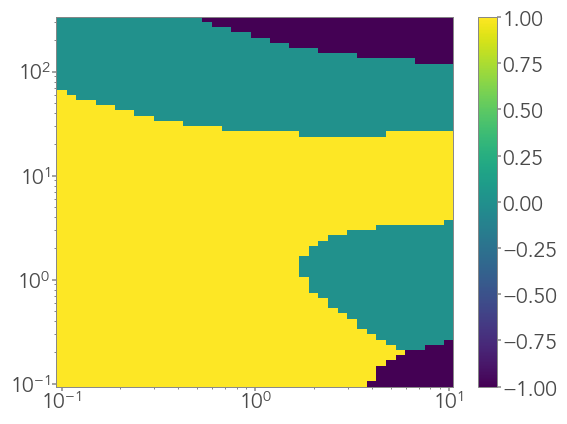

In [17]:
theta_y_ts, sigma_CP_ts, Trasnduction_ts = load_countour_from_mathematica("../data/mathematica/FigSM_ContourPlot_timescales.txt")
plt.pcolormesh(theta_y_ts, sigma_CP_ts, Trasnduction_ts.T, cmap = 'viridis', shading = 'auto')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()
plt.show()

In [25]:
sigma_Sdot_ayeta_M1, Sdot_ayeta_M1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_ThetayMinus1_(x_sigma)_(y_Sdot_ayη).txt")
sigma_Sdot_axy_M1, Sdot_axy_M1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_ThetayMinus1_(x_sigma)_(y_Sdot_axy).txt")
sigma_Iyeta_ayeta_M1, Iyeta_ayeta_M1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_ThetayMinus1_(x_sigma)_(y_IyEta_ayη).txt")
sigma_Iyeta_axy_M1, Iyeta_axy_M1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_ThetayMinus1_(x_sigma)_(y_IyEta_axy).txt")

sigma_Sdot_ayeta_P1, Sdot_ayeta_P1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_Thetay1_(x_sigma)_(y_Sdot_ayη).txt")
sigma_Sdot_axy_P1, Sdot_axy_P1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_Thetay1_(x_sigma)_(y_Sdot_axy).txt")
sigma_Iyeta_ayeta_P1, Iyeta_ayeta_P1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_Thetay1_(x_sigma)_(y_IyEta_ayη).txt")
sigma_Iyeta_axy_P1, Iyeta_axy_P1 = load_from_mathematica("../data/mathematica/FigSM_ThetaEta50_Thetay1_(x_sigma)_(y_IyEta_axy).txt")

In [27]:
sigma_Sdot_ayeta_FB, Sdot_ayeta_FB = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_Sdot_ayη)_Feedback.txt")
sigma_Sdot_axy_FB, Sdot_axy_FB = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_Sdot_axy)_Feedback.txt")
sigma_Iyeta_ayeta_FB, Iyeta_ayeta_FB = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_IyEta_ayη)_Feedback.txt")
sigma_Iyeta_axy_FB, Iyeta_axy_FB = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_IyEta_axy)_Feedback.txt")

sigma_Sdot_ayeta_mPP, Sdot_ayeta_mPP = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_Sdot_ayη)_mPP.txt")
sigma_Sdot_axy_mPP, Sdot_axy_mPP = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_Sdot_axy)_mPP.txt")
sigma_Iyeta_ayeta_mPP, Iyeta_ayeta_mPP = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_IyEta_ayη)_mPP.txt")
sigma_Iyeta_axy_mPP, Iyeta_axy_mPP = load_from_mathematica("../data/mathematica/FigSM_TScaleSep_(x_sigma)_(y_IyEta_axy)_mPP.txt")

In [145]:
c2 = '#dc6400'
c1 = '#0f4c5c'

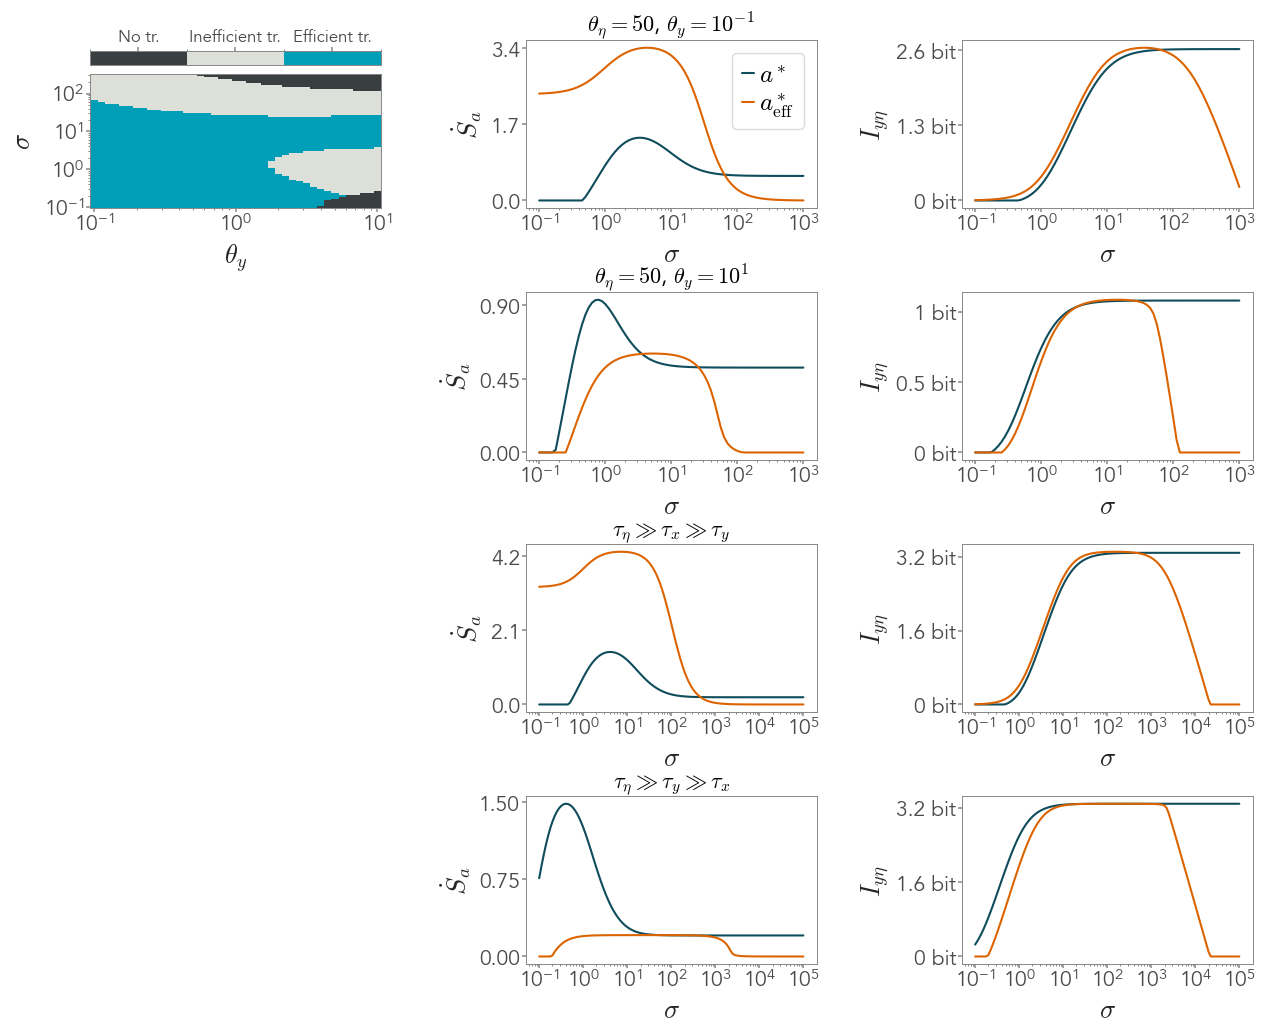

In [153]:
fig, axs = plt.subplots(4, 3, figsize = (15, 12))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

colors_cmap = ["#393e41", "#dce0d9", "#009fb7"]

cmap = mpl.colors.ListedColormap(colors_cmap)
norm = mpl.colors.BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap.N) 

im = axs[0,0].pcolormesh(theta_y_ts, sigma_CP_ts, Trasnduction_ts.T, cmap = cmap, norm = norm)
axs[0,0].set_yscale('log')
axs[0,0].set_xscale('log')
cbar = fig.colorbar(im, ax = axs[0,0], ticks = [-1, 0, 1], orientation = 'horizontal', location = 'top')
cbar.ax.set_xticklabels(['No tr.', 'Inefficient tr.', 'Efficient tr.'], rotation = 0, fontsize = 12)
axs[0,0].set_xlabel(r'$\theta_y$')
axs[0,0].set_ylabel(r'$\sigma$')

axs[1,0].axis('off')


axs[0,1].plot(sigma_Sdot_ayeta_M1, Sdot_ayeta_M1, color = c1, label = r'$a^*$')
axs[0,1].plot(sigma_Sdot_axy_M1, Sdot_axy_M1, color = c2, label = r'$a^*_{\rm eff}$')
axs[0,1].set_xscale('log')
axs[0,1].set_ylabel(r'$\dot{S}_a$')
axs[0,1].set_xlabel(r'$\sigma$')
axs[0,1].set_yticks([0, 1.7, 3.4])
axs[0,1].legend()
axs[0,1].set_title(r"$\theta_\eta = 50$, $\theta_y = 10^{-1}$", fontsize = 16)


axs[0,2].plot(sigma_Iyeta_ayeta_M1, Iyeta_ayeta_M1/np.log(2), color = c1)
axs[0,2].plot(sigma_Iyeta_axy_M1, Iyeta_axy_M1/np.log(2), color = c2)
axs[0,2].set_xscale('log')
axs[0,2].set_ylabel(r'$I_{y\eta}$')
axs[0,2].set_xlabel(r'$\sigma$')
axs[0,2].set_yticks([0, 1.3, 2.6])
axs[0,2].set_yticklabels(["0 bit", "1.3 bit", "2.6 bit"])

axs[1,1].plot(sigma_Sdot_ayeta_P1, Sdot_ayeta_P1, color = c1)
axs[1,1].plot(sigma_Sdot_axy_P1, Sdot_axy_P1, color = c2)
axs[1,1].set_xscale('log')
axs[1,1].set_ylabel(r'$\dot{S}_a$')
axs[1,1].set_xlabel(r'$\sigma$')
axs[1,1].set_yticks([0, 0.45, 0.9])
axs[1,1].set_title(r"$\theta_\eta = 50$, $\theta_y = 10^{1}$", fontsize = 16)

axs[1,2].plot(sigma_Iyeta_ayeta_P1, Iyeta_ayeta_P1/np.log(2), color = c1)
axs[1,2].plot(sigma_Iyeta_axy_P1, Iyeta_axy_P1/np.log(2), color = c2)
axs[1,2].set_xscale('log')
axs[1,2].set_ylabel(r'$I_{y\eta}$')
axs[1,2].set_xlabel(r'$\sigma$')
axs[1,2].set_yticks([0, 0.5, 1.])
axs[1,2].set_yticklabels(["0 bit", "0.5 bit", "1 bit"])

axs[2,0].axis('off')

axs[2,1].plot(sigma_Sdot_ayeta_FB, Sdot_ayeta_FB, color = c1)
axs[2,1].plot(sigma_Sdot_axy_FB, Sdot_axy_FB, color = c2)
axs[2,1].set_xscale('log')
axs[2,1].set_ylabel(r'$\dot{S}_a$')
axs[2,1].set_xlabel(r'$\sigma$')
axs[2,1].set_yticks([0, 2.1, 4.2])
axs[2,1].set_title(r"$\tau_\eta \gg \tau_x \gg \tau_y$", fontsize = 16)

axs[2,2].plot(sigma_Iyeta_ayeta_FB, Iyeta_ayeta_FB/np.log(2), color = c1)
axs[2,2].plot(sigma_Iyeta_axy_FB, Iyeta_axy_FB/np.log(2), color = c2)
axs[2,2].set_xscale('log')
axs[2,2].set_ylabel(r'$I_{y\eta}$')
axs[2,2].set_xlabel(r'$\sigma$')
axs[2,2].set_yticks([0, 1.6, 3.2])
axs[2,2].set_yticklabels(["0 bit", "1.6 bit", "3.2 bit"])

axs[3,0].axis('off')

axs[3,1].plot(sigma_Sdot_ayeta_mPP, Sdot_ayeta_mPP, color = c1)
axs[3,1].plot(sigma_Sdot_axy_mPP, Sdot_axy_mPP, color = c2)
axs[3,1].set_xscale('log')
axs[3,1].set_ylabel(r'$\dot{S}_a$')
axs[3,1].set_xlabel(r'$\sigma$')
axs[3,1].set_yticks([0, 0.75, 1.5])
axs[3,1].set_title(r"$\tau_\eta \gg \tau_y \gg \tau_x$", fontsize = 16)

axs[3,2].plot(sigma_Iyeta_ayeta_mPP, Iyeta_ayeta_mPP/np.log(2), color = c1)
axs[3,2].plot(sigma_Iyeta_axy_mPP, Iyeta_axy_mPP/np.log(2), color = c2)
axs[3,2].set_xscale('log')
axs[3,2].set_ylabel(r'$I_{y\eta}$')
axs[3,2].set_xlabel(r'$\sigma$')
axs[3,2].set_yticks([0, 1.6, 3.2])
axs[3,2].set_yticklabels(["0 bit", "1.6 bit", "3.2 bit"])

for ax in [axs[0,1], axs[0,2], axs[1,1], axs[1,2], axs[2,1], axs[2,2], axs[3,1], axs[3,2]]:
    fplot.restore_log_ticks(ax.xaxis, 10)

fplot.restore_log_ticks(axs[0,0].yaxis, 10)

plt.savefig("../figures/SM/SM_timescales_draft.svg", dpi = 300, bbox_inches = 'tight')
plt.show()

# Constrained optimization with $a^2$

In [21]:
from matplotlib.colors import LinearSegmentedColormap
c1 = '#dc6400'
c2 = '#0f4c5c'
c3 = '#bc4749'

colors = ["w", "#F6FBE4", "#ECF6C9", "#E3F2AE", "#d9ed92", "#b5e48c", "#99d98c",
          "#76c893", "#52b69a", "#34a0a4", "#168aad", "#1a759f", "#1e6091", "#184e77"]
nodes = np.linspace(0, 1, len(colors))
cmap_PD = LinearSegmentedColormap.from_list("cmap_SR", list(zip(nodes, colors)))

cmap_opt = fplot.white_to_color(c2)
cmap_eff = fplot.white_to_color(c1)

In [22]:
sigma_Iyeta_axy_a2, Iyeta_axy_a2 = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_IyEta_axy_a2).txt')
sigma_Iyeta_axy, Iyeta_axy = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_IyEta_axy).txt')

sigma_Iyeta_ayeta_a2, Iyeta_ayeta_a2 = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_IyEta_ayeta_a2).txt')
sigma_Iyeta_ayeta, Iyeta_ayeta = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_IyEta_ayeta).txt')

sigma_Sdot_axy_a2, Sdot_axy_a2 = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_Sdotmin_axy_a2).txt')
sigma_Sdot_axy, Sdot_axy = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_Sdotmin_axy).txt')

sigma_Sdot_ayeta_a2, Sdot_ayeta_a2 = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_Sdotmin_ayeta_a2).txt')
sigma_Sdot_ayeta, Sdot_ayeta = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_Sdotmin_ayeta).txt')

sigma_Sdot_div, Sdot_div = load_from_mathematica('../data/mathematica/FigSM_Lambda0.9_ThetaEta5_(x_sigma)_(y_Sdotmin_Divergence).txt')

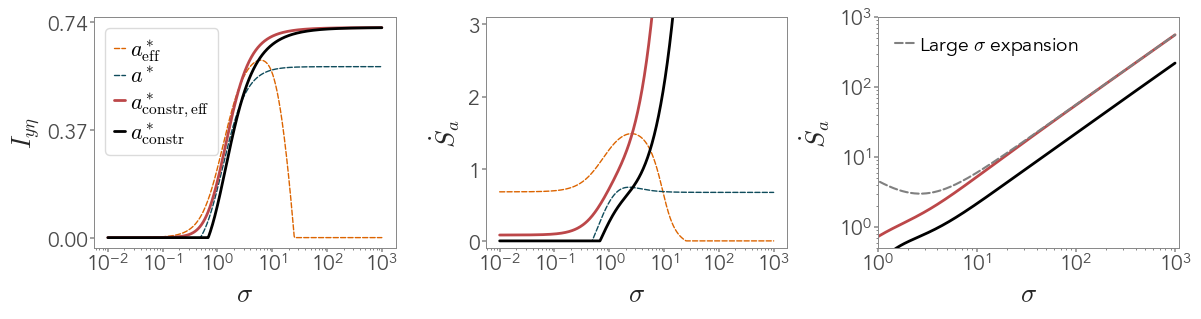

In [23]:
fig, axs = plt.subplots(1, 3, figsize = (14, 3))


axs[0].plot(sigma_Iyeta_axy[sigma_Iyeta_axy > 5e-2], Iyeta_axy[sigma_Iyeta_axy > 5e-2]/np.log(2),
            label = r'$a^*_{\rm eff}$', color = c1, lw = 1, ls = '--')
axs[0].plot(sigma_Iyeta_ayeta[sigma_Iyeta_ayeta > 5e-2], Iyeta_ayeta[sigma_Iyeta_ayeta > 5e-2]/np.log(2),
               label = r'$a^*$', color = c2, lw = 1, ls = '--')
axs[0].plot(sigma_Iyeta_axy_a2, Iyeta_axy_a2/np.log(2),
            label = r'$a^*_{\rm constr, eff}$', color = c3, lw = 2)
axs[0].plot(sigma_Iyeta_ayeta_a2, Iyeta_ayeta_a2/np.log(2),
            label = r'$a^*_{\rm constr}$', color = 'k', lw = 2)

axs[0].legend(fontsize = 16)

axs[1].plot(sigma_Sdot_axy, Sdot_axy,
            label = r'$a^*_{\rm eff}$', color = c1, lw = 1, ls = '--')
axs[1].plot(sigma_Sdot_ayeta, Sdot_ayeta,
               label = r'$a^*$', color = c2, lw = 1, ls = '--')
axs[1].plot(sigma_Sdot_axy_a2, Sdot_axy_a2,
            label = r'$a^*_{\rm constr}$', color = c3, lw = 2)
axs[1].plot(sigma_Sdot_ayeta_a2, Sdot_ayeta_a2,
            label = r'$a^*_{\rm constr}$', color = 'k', lw = 2)
axs[1].set_ylim(-0.1,3.1)

axs[2].plot(sigma_Sdot_axy_a2, Sdot_axy_a2,
            color = c3, lw = 2)
axs[2].plot(sigma_Sdot_ayeta_a2, Sdot_ayeta_a2,
            color = 'k', lw = 2)
axs[2].plot(sigma_Sdot_div, Sdot_div, color = 'gray', lw = 1.5, ls = '--', label = "Large $\sigma$ expansion")
axs[2].set_yscale('log')
axs[2].set_xlim(1, 1100)
axs[2].set_ylim(0.5, 1e3)


for ax in axs:
    ax.set_xscale('log')
    fplot.restore_log_ticks(ax.xaxis, 10)
    ax.set_xlabel(r'$\sigma$')

axs[0].set_ylabel(r'$I_{y \eta}$')
axs[0].set_yticks([0, 0.37, 0.74])

axs[1].set_ylabel(r'$\dot{S}_{a}$')
axs[2].set_ylabel(r'$\dot{S}_a$')
axs[2].legend(fontsize = 14, frameon = False, handlelength = 1., handletextpad = 0.2)

plt.subplots_adjust(wspace = 0.3)

plt.savefig('../figures/SM/SM_constrained_functional_draft.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

# General plots with a

In [227]:
theta_eta = 50
sigma_array = np.array([0.5, 1, 10, 20])
a_array = np.linspace(0, 3, 1000)

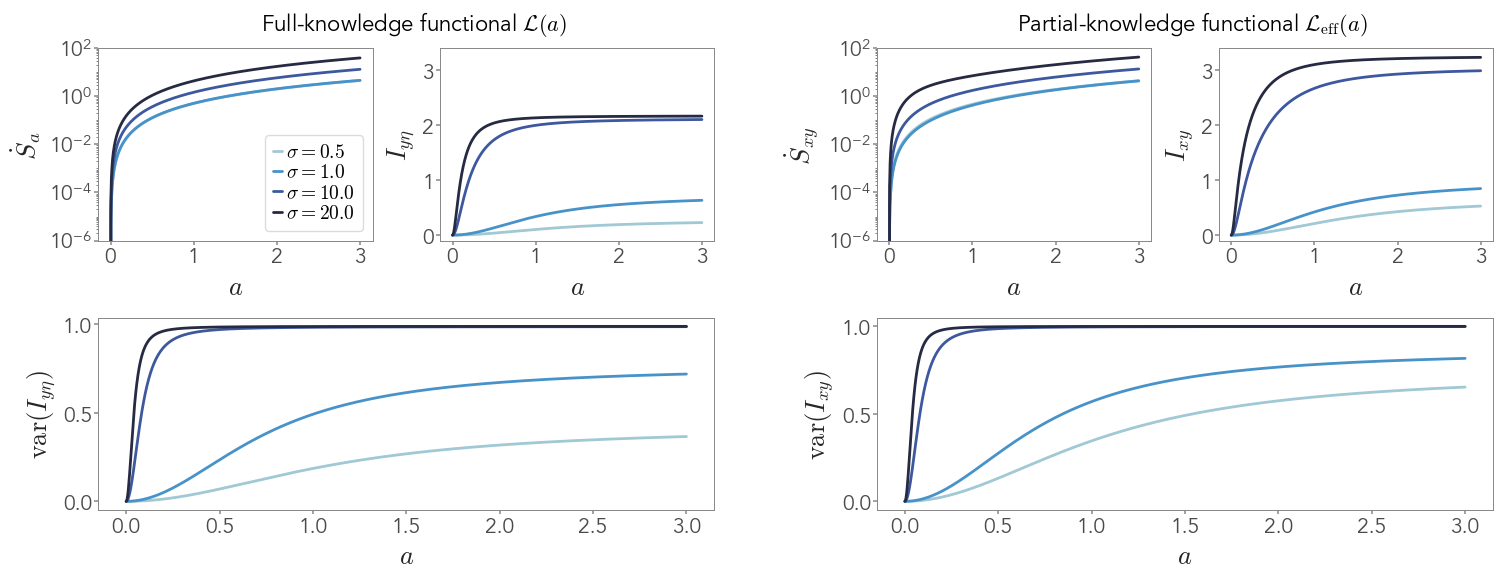

In [236]:
fig, axs = plt.subplot_mosaic([[0, 1, 2, 3, 4],
                               [5, 5, 6, 7, 7]], figsize = (18, 6),
                        gridspec_kw = {'width_ratios': [1, 1, 0.1, 1, 1]})

colors = plt.get_cmap("cmr.arctic_r")(np.linspace(0.2, 0.8, len(sigma_array)))

for i, sigma in enumerate(sigma_array):
    Sdota = fa.Sdota_exact(sigma, a_array, theta_eta)
    Ixy = fa.Ixy_exact(sigma, a_array, theta_eta)/np.log(2)
    Iyeta = fa.Iyeta_exact(sigma, a_array, theta_eta)/np.log(2)
    Sxy = fa.Sxy_exact(sigma, a_array, theta_eta)

    axs[0].plot(a_array, Sdota, color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)
    axs[1].plot(a_array, Iyeta, color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)

    axs[4].plot(a_array, Ixy, color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)
    axs[3].plot(a_array, Sxy, color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)

    axs[5].plot(a_array, 1 - np.exp(-2*Iyeta), color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)
    axs[7].plot(a_array, 1 - np.exp(-2*Ixy), color = colors[i], label = r"$\sigma = %.1f$" % sigma, lw = 2)

for ax in [axs[0], axs[1], axs[3], axs[4], axs[5], axs[7]]:
    ax.set_xlabel(r"$a$")

axs[0].set_ylabel(r"$\dot{S}_{a}$")
axs[1].set_ylabel(r"$I_{y\eta}$")
axs[3].set_ylabel(r"$\dot{S}_{xy}$")
axs[4].set_ylabel(r"$I_{xy}$")
axs[5].set_ylabel(r"$\mathrm{var}(I_{y\eta})$")
axs[7].set_ylabel(r"$\mathrm{var}(I_{xy})$")

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

for ax in [axs[0], axs[3]]:
    ax.set_yscale('log')
    ax.set_ylim(1e-6, 1e2)
    fplot.restore_log_ticks(ax.yaxis, 6)

for ax in [axs[1], axs[4]]:
    ax.set_ylim(-0.1, 3.4)

axs[2].axis('off')
axs[6].axis('off')
axs[0].legend(loc = 'lower right', fontsize = 14)

axs[0].set_title(r"Full-knowledge functional $\mathcal{L}(a)$", x = 1.15, y = 1.05, fontsize = 16)
axs[3].set_title(r"Partial-knowledge functional $\mathcal{L}_\mathrm{eff}(a)$", x = 1.15, y = 1.05, fontsize = 16)

plt.savefig("../figures/SM/SM_change_with_a.png", bbox_inches = 'tight', dpi = 300)
plt.show()

# Functionals comparison

In [179]:
theta_eta = 50
Lambda = 0.9

sigma_array = np.array([0.25, 10, 75, 500])

amax_array = np.array([2, 2, 0.2, 0.053])

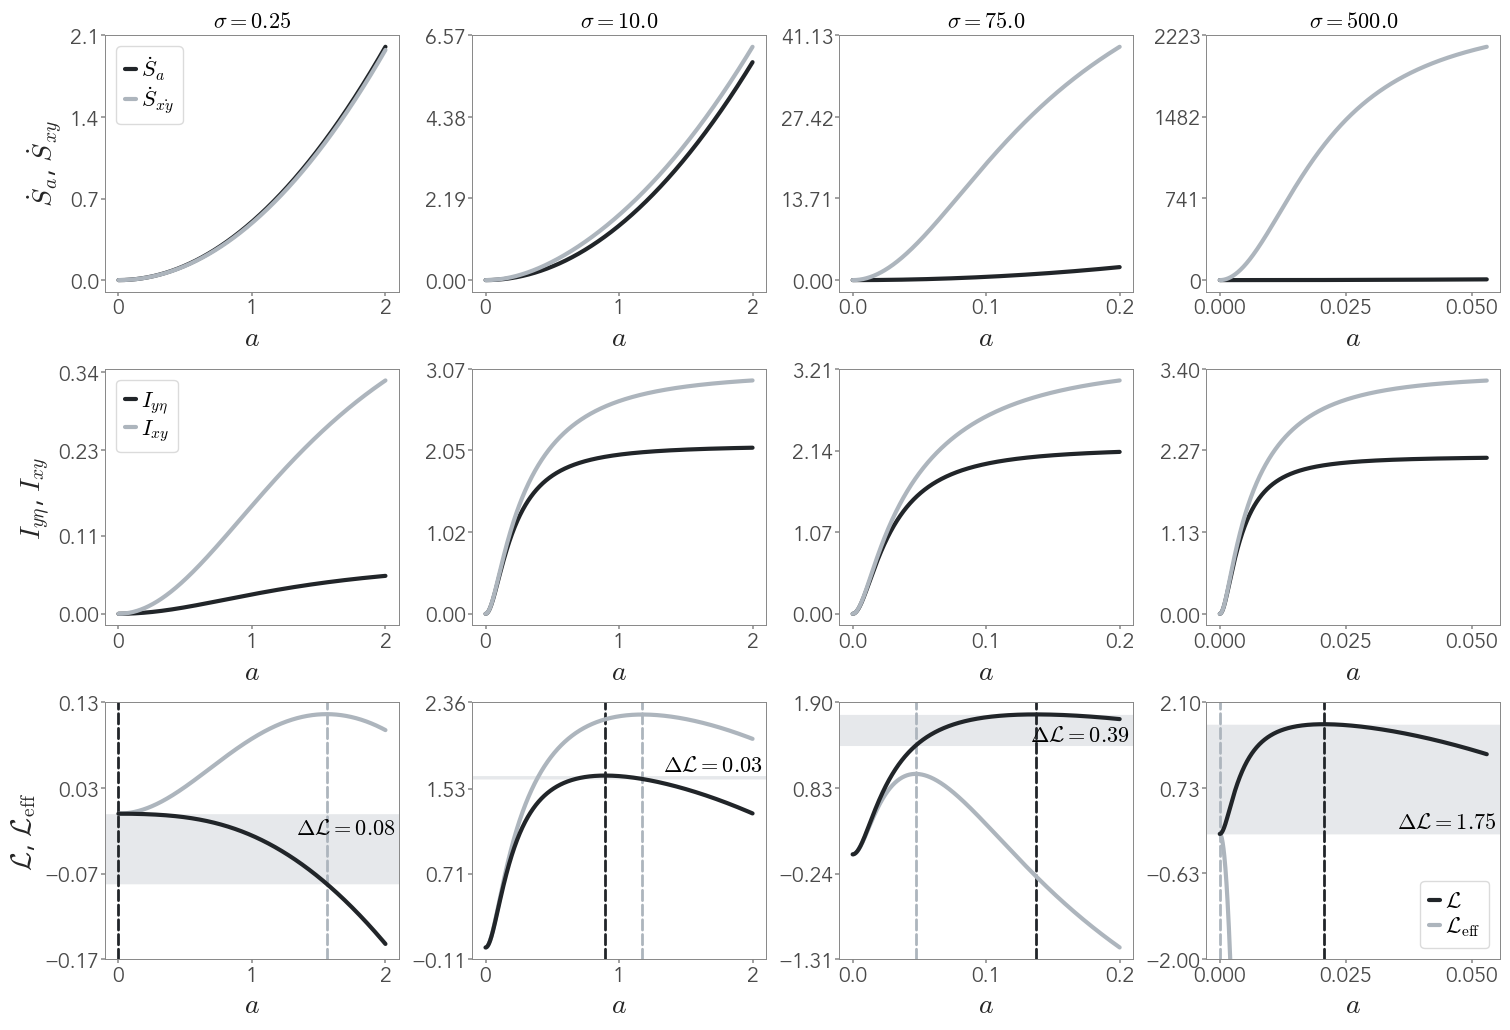

In [213]:
fig, axss = plt.subplots(3, 4, figsize = (18, 12))
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)

axs  = axss[0]
for i, sigma in enumerate(sigma_array):
    a_array = np.linspace(0, amax_array[i], 1000)
    Sdota = fa.Sdota_exact(sigma, a_array, theta_eta)
    Sxy = fa.Sxy_exact(sigma, a_array, theta_eta)

    axs[i].plot(a_array, Sdota, label = r'$\dot{S}_{a}$', color = '#212529', lw = 3)
    axs[i].plot(a_array, Sxy, label = r'$\dot{S}_{\dot{xy}}$', color = '#adb5bd', lw = 3)

    axs[i].set_title(r'$\sigma = {}$'.format(sigma), fontsize = 16)
    axs[i].set_xlabel(r'$a$', fontsize = 20)

    #axs[i].set_ylim(-1, 1)
    #axs[i].set_xlim(0, amax_array[i])

    # set four ticks in the y axis
    ylims = axs[i].get_ylim()
    yticks = np.round(np.linspace(0, ylims[1], 4), 2)
    axs[i].set_yticks(yticks)

    if i == 0:
        axs[i].set_ylabel(r'$\dot{S}_{a}$, $\dot{S}_{xy}$', fontsize = 20)
        axs[i].legend(fontsize = 16)
axs[-1].set_xticks([0, 0.025, 0.05])


axs  = axss[1]
for i, sigma in enumerate(sigma_array):
    a_array = np.linspace(0, amax_array[i], 1000)
    Iyeta = fa.Iyeta_exact(sigma, a_array, theta_eta)/np.log(2)
    Ixy = fa.Ixy_exact(sigma, a_array, theta_eta)/np.log(2)

    axs[i].plot(a_array, Iyeta, label = r'$I_{y\eta}$', color = '#212529', lw = 3)
    axs[i].plot(a_array, Ixy, label = r'$I_{xy}$', color = '#adb5bd', lw = 3)

    axs[i].set_xlabel(r'$a$', fontsize = 20)

    # set four ticks in the y axis
    ylims = axs[i].get_ylim()
    yticks = np.round(np.linspace(0, ylims[1], 4), 2)
    axs[i].set_yticks(yticks)

    if i == 0:
        axs[i].set_ylabel(r'$I_{y\eta}$, $I_{xy}$', fontsize = 20)
        axs[i].legend(fontsize = 16)
axs[-1].set_xticks([0, 0.025, 0.05])

testpos = [[0.65, 0.485], [0.65, 0.73], [0.65, 0.85], [0.65, 0.51]]

axs  = axss[-1]
axs[-1].set_ylim(-2, 2.1)
for i, sigma in enumerate(sigma_array):
    a_array = np.linspace(0, amax_array[i], 1000)
    L_exact = -(1-Lambda)*fa.Sdota_exact(sigma, a_array, theta_eta) + Lambda*fa.Iyeta_exact(sigma, a_array, theta_eta)/np.log(2)
    L_eff = -(1-Lambda)*fa.Sxy_exact(sigma, a_array, theta_eta) + Lambda*fa.Ixy_exact(sigma, a_array, theta_eta)/np.log(2)

    axs[i].plot(a_array, L_exact, label = '$\mathcal{L}$', color = "#212529", lw = 3, zorder = 10)
    axs[i].plot(a_array, L_eff, label = '$\mathcal{L}_\mathrm{eff}$', color = "#adb5bd", lw = 3, zorder = 9)

    axs[i].axvline(a_array[np.argmax(L_exact)], color = '#212529', linestyle = '--', lw = 2)
    axs[i].axvline(a_array[np.argmax(L_eff)], color = '#adb5bd', linestyle = '--', lw = 2)

    axs[i].set_xlabel(r'$a$', fontsize = 20)

    Lexact_astar = np.max(L_exact)
    Lexact_aeff = L_exact[np.argmax(L_eff)]

    xlims = axs[i].get_xlim()
    xspace = np.linspace(xlims[0], xlims[1], 1000)

    axs[i].fill_between(xspace, Lexact_aeff, Lexact_astar, color = '#adb5bd', alpha = 0.3, lw = 0)
    axs[i].set_xlim(xlims)

    # set four ticks in the y axis
    ylims = axs[i].get_ylim()
    yticks = np.round(np.linspace(ylims[0], ylims[1], 4), 2)
    axs[i].set_yticks(yticks)

    # add text at the top right of the filled area
    axs[i].text(*testpos[i], r'$\Delta \mathcal{{L}}  = {:.2f}$'.format(Lexact_astar - Lexact_aeff), transform = axs[i].transAxes, fontsize = 16, zorder = np.inf)


axs[0].set_ylabel(r'$\mathcal{L}$, $\mathcal{L}_\mathrm{eff}$', fontsize = 20)
axs[-1].set_xticks([0, 0.025, 0.05])

axs[-1].legend(fontsize = 16)

plt.savefig('../figures/SM/SM_functionals_draft.svg', bbox_inches = 'tight')
plt.savefig('../figures/SM/SM_functionals.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [37]:
a_array= np.linspace(0, 10, 100)
sigma_array = np.geomspace(1e-1, 1000, 100)
theta_eta = 50

Sdota_array = np.zeros((len(sigma_array), len(a_array)))
Iyeta_array = np.zeros((len(sigma_array), len(a_array)))
Sxy_array = np.zeros((len(sigma_array), len(a_array)))
Ixy_array = np.zeros((len(sigma_array), len(a_array)))

for i, sigma in enumerate(sigma_array):
    Sdota_array[i] = fa.Sdota_exact(sigma, a_array, theta_eta)
    Iyeta_array[i] = fa.Iyeta_exact(sigma, a_array, theta_eta)
    Sxy_array[i] = fa.Sxy_exact(sigma, a_array, theta_eta)
    Ixy_array[i] = fa.Ixy_exact(sigma, a_array, theta_eta)

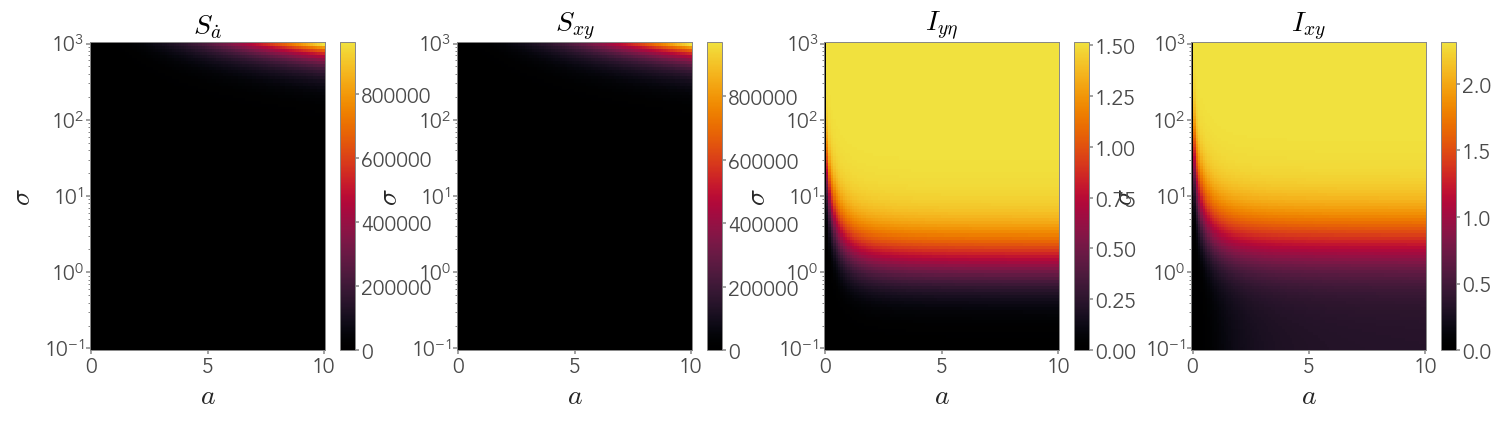

In [40]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))
plt.subplots_adjust(wspace = 0.25)

axs[0].pcolor(a_array, sigma_array, Sdota_array, cmap = plt.get_cmap('cmr.ember'), shading = 'auto')
axs[0].set_title(r'$S_{\dot{a}}$', fontsize = 20)
axs[0].set_xlabel(r'$a$', fontsize = 20)
axs[0].set_ylabel(r'$\sigma$', fontsize = 20)
plt.colorbar(axs[0].pcolor(a_array, sigma_array, Sdota_array, cmap = plt.get_cmap('cmr.ember')), ax = axs[0])

axs[1].pcolor(a_array, sigma_array, Sxy_array, cmap = plt.get_cmap('cmr.ember'), shading = 'auto')
axs[1].set_title(r'$S_{xy}$', fontsize = 20)
axs[1].set_xlabel(r'$a$', fontsize = 20)
axs[1].set_ylabel(r'$\sigma$', fontsize = 20)
plt.colorbar(axs[1].pcolor(a_array, sigma_array, Sxy_array, cmap = plt.get_cmap('cmr.ember')), ax = axs[1])

axs[2].pcolor(a_array, sigma_array, Iyeta_array, cmap = plt.get_cmap('cmr.ember'), shading = 'auto')
axs[2].set_title(r'$I_{y\eta}$', fontsize = 20)
axs[2].set_xlabel(r'$a$', fontsize = 20)
axs[2].set_ylabel(r'$\sigma$', fontsize = 20)
plt.colorbar(axs[2].pcolor(a_array, sigma_array, Iyeta_array, cmap = plt.get_cmap('cmr.ember')), ax = axs[2])

axs[3].pcolor(a_array, sigma_array, Ixy_array, cmap = plt.get_cmap('cmr.ember'), shading = 'auto')
axs[3].set_title(r'$I_{xy}$', fontsize = 20)
axs[3].set_xlabel(r'$a$', fontsize = 20)
axs[3].set_ylabel(r'$\sigma$', fontsize = 20)
plt.colorbar(axs[3].pcolor(a_array, sigma_array, Ixy_array, cmap = plt.get_cmap('cmr.ember')), ax = axs[3])

for ax in axs:
    ax.set_yscale('log')

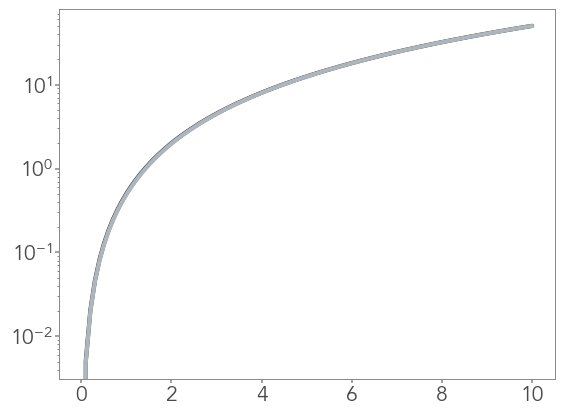

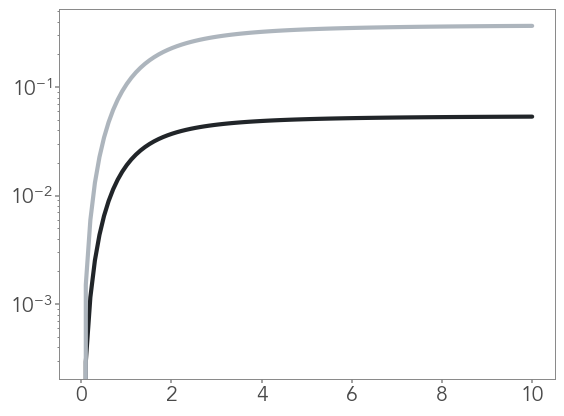

In [45]:
a_array= np.linspace(0, 10, 100)
sigma_array = 0.25
theta_eta = 50

plt.plot(a_array, fa.Sdota_exact(sigma_array, a_array, theta_eta), label = r'$S_{\dot{a}}$', color = '#212529', lw = 3)
plt.plot(a_array, fa.Sxy_exact(sigma_array, a_array, theta_eta), label = r'$I_{y\eta}$', color = '#adb5bd', lw = 3)
plt.yscale('log')
plt.show()

plt.plot(a_array, fa.Iyeta_exact(sigma_array, a_array, theta_eta), label = r'$I_{y\eta}$', color = '#212529', lw = 3)
plt.plot(a_array, fa.Ixy_exact(sigma_array, a_array, theta_eta), label = r'$I_{xy}$', color = '#adb5bd', lw = 3)
plt.yscale('log')
plt.show()

# Analytical probability

In [7]:
Nadapt_max = 50000
Nadapt_min = 10000
Ncheck = 5000
Nrepeat = 320
sigma = 1.5
theta_eta = 3.

delta_a = 0.05
Lambda = 0.9

dt = 1e-3

Nsteps_array = np.array([3, 4, 5, 6, 7])
Nsteps_array = 10**Nsteps_array

In [8]:
a_adapt_final = np.zeros((Nsteps_array.size, Nrepeat))

CVyeta = np.zeros((Nsteps_array.size, Nrepeat))

for i in range(len(Nsteps_array)):
    Ixy_adapt = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adapt_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    a_final = np.zeros(Nrepeat)
    Iyeta = np.zeros(Nrepeat)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        a_final[j] = abs(a_curr[-1])
        Iyeta[j] = fa.Iyeta_exact(sigma, a_final[j], theta_eta)

    a_adapt_final[i, :] = a_final
    CVyeta[i, :] = Iyeta**2/(1 - np.exp(-2*Iyeta))
    
np.save(f'../data/adapt_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy', a_adapt_final)
np.save(f'../data/adapt_CVyeta_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy', CVyeta)

In [9]:
aopt = 1.36585
CVopt = 0.09793

In [10]:
sys.path.append('../../lib/')
import funPlots as fplot

fplot.master_format(ncols = 2, nrows = 1)

In [11]:
a_final = np.load(f'../data/adapt_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
CVyeta = np.load(f'../data/adapt_CVyeta_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
a_space = np.linspace(0, 2.17, 2500)

colors_list = ["#" + s for s in ["9d0208","dc2f02","e85d04","f48c06","faa307"]]
colors_list = colors_list[::-1]

colors_list = ["#d9ed92", "#99d98c",
               "#52b69a", "#168aad",  "#184e77"]
colors_list = colors_list[:5]

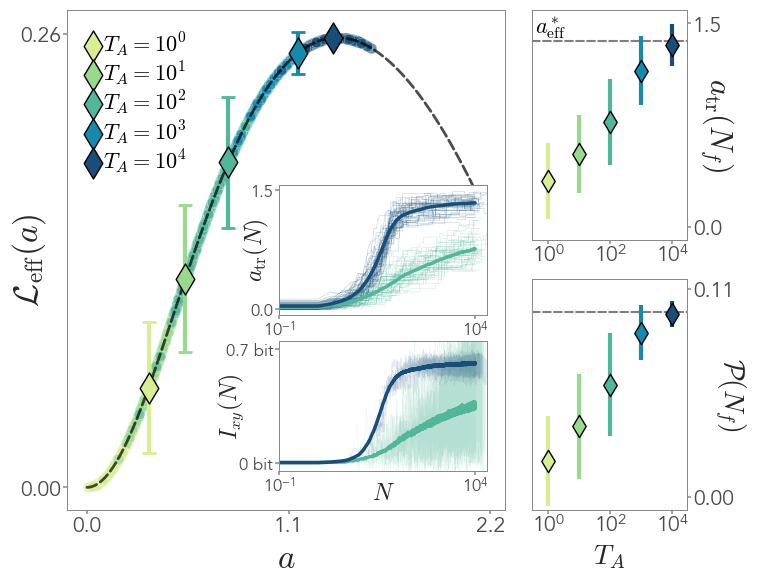

In [12]:
fig, axs = plt.subplot_mosaic([['main', 'main', "s1"],
                               ['main', 'main', "s2"]], figsize=(8, 6.5))

plt.subplots_adjust(wspace=0.5, hspace=0.17)

# increase width of main plot
box = axs['main'].get_position()
axs['main'].set_position([box.x0, box.y0, box.width * 1.13, box.height])

axs['main'].plot(a_space, fa.functional_exact(sigma, a_space, theta_eta, Lambda), 'k--', zorder = np.inf, lw = 2, alpha = 0.7)

# add an axis on a specified position

for i in range(len(Nsteps_array)):
    color = colors_list[i]
    axs['main'].scatter(a_final[i, :], fa.functional_exact(sigma, a_final[i, :], theta_eta, Lambda),
                        s=60, alpha = 0.6, c = color, ec = "w", lw = 0.3)

    axs['main'].errorbar(np.mean(a_final[i, :]), fa.functional_exact(sigma, np.mean(a_final[i, :]), theta_eta, Lambda),
                         yerr = np.std(fa.functional_exact(sigma, a_final[i, :], theta_eta, Lambda)),
                         color = color, capsize = 5, zorder = np.inf, lw = 3, alpha = 1, fmt = "none", capthick=2)
    
    axs['main'].scatter(np.mean(a_final[i, :]), fa.functional_exact(sigma, np.mean(a_final[i, :]), theta_eta, Lambda),
                        s=250, label=f'$T_A=10^{{{int(np.log10(Nsteps_array[i]*dt))}}}$', alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                        marker = "d")
    

    axs["s1"].scatter(Nsteps_array[i]*dt, np.mean(a_final[i, :]), s=130, alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                      marker = "d")
    
    axs["s1"].errorbar(Nsteps_array[i]*dt, np.mean(a_final[i, :]), yerr = 2*np.std(a_final[i, :]),
                       color = color, capsize = 0, zorder = -1, lw = 3, alpha = 1, fmt = "none", capthick=2)

    axs["s2"].scatter(Nsteps_array[i]*dt, np.mean(CVyeta[i, :]), s=130, alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                      marker = "d")
    
    axs["s2"].errorbar(Nsteps_array[i]*dt, np.mean(CVyeta[i, :]), yerr = 2*np.std(CVyeta[i, :]),
                          color = color, capsize = 0, zorder = -1, lw = 3, alpha = 1, fmt = "none", capthick=2)
    
axs["s2"].axhline(CVopt, color='k', alpha = 0.5, zorder = -10, ls = '--')
axs["s2"].set_ylim(-0.007, 0.115)
axs["s2"].set_yticks([0, 0.11])
axs["s2"].set_ylabel(r'$\mathcal{P}(N_f)$', fontsize = 20, labelpad = 10, rotation = -90)

for aa in [axs["s1"], axs["s2"]]:
    aa.set_xscale("log")
    aa.set_xlim(3e-1, 3e4)
    
    aa.set_xticks([1e0, 1e2, 1e4])

    fplot.right_ylabel(aa)

axs["s1"].axhline(aopt, color='k', alpha = 0.5, zorder = -10, ls = '--')
axs["s1"].set_ylim(-0.1, 1.6)
axs["s1"].set_yticks([0, 1.5])

axs["s1"].set_ylabel(r'$a_{\rm tr}(N_f)$', fontsize = 22, labelpad = 10, rotation = -90)
axs["s2"].set_xlabel(r'$T_A$', fontsize = 20)
# add text
axs['main'].text(1.07, 0.99, r'$a^*_{\rm eff}$', fontsize = 16, transform=axs['main'].transAxes, verticalalignment='top')

axs['main'].set_ylabel(r'$\mathcal{L}_{\rm eff}(a)$', fontsize = 24, labelpad = -20)
axs["main"].set_xlabel(r'$a$', fontsize = 24)
axs["main"].set_xticks([0, 1.1, 2.2])
axs["main"].set_yticks([0, 0.26])

    
inset1 = fig.add_axes([0.39, 0.17, 0.26, 0.2])
inset2 = fig.add_axes([0.39, 0.41, 0.26, 0.2])

inset1.tick_params(axis='both', which='major', labelsize=12)
inset2.tick_params(axis='both', which='major', labelsize=12)

atraj1 = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
atraj2 = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
stop1 = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
stop2 = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

Itraj1 = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')/np.log(2)
Itraj2 = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')/np.log(2)

amean1 = np.mean(abs(atraj1)[:, :np.min(stop1)], axis = 0)
amean2 = np.mean(abs(atraj2)[:, :np.min(stop2)], axis = 0)

Imean1 = np.mean(Itraj1[:, :np.min(stop1)], axis = 0)
Imean2 = np.mean(Itraj2[:, :np.min(stop2)], axis = 0)

lwa = 0.2
alphaa = 0.5
lwI = 0.5
alphaI = 0.1

for j in range(50):
    a_curr = atraj2[j, :stop2[j]]
    inset2.plot(abs(a_curr), color = colors_list[-3], lw = lwa, alpha = alphaa, zorder = -1)

    a_curr = atraj1[j, :stop1[j]]
    inset2.plot(abs(a_curr), color = colors_list[-1], lw = lwa, alpha = alphaa, zorder = 1)

for j in range(10,15):
    I_curr = Itraj2[j, :stop2[j]]
    inset1.plot(I_curr, color = colors_list[-3], lw = lwI, alpha = alphaI, zorder = -1)

    I_curr = Itraj1[j, :stop1[j]]
    inset1.plot(I_curr, color = colors_list[-1], lw = lwI, alpha = alphaI, zorder = 1)

inset2.plot(amean2, color = colors_list[-3], lw = 2.5, alpha = 1)
inset2.plot(amean1, color = colors_list[-1], lw = 2.5, alpha = 1)

inset2.set_xscale("log")
inset2.set_xlim(1e-1, 2e4)

inset1.plot(Imean2, color = colors_list[-3], lw = 2.5, alpha = 1)
inset1.plot(Imean1, color = colors_list[-1], lw = 2.5, alpha = 1)

inset1.set_xscale("log")
inset1.set_xlim(1e-1, 2e4)
inset1.set_ylim(-0.05, 0.75)

inset1.set_ylabel(r'$I_{xy}(N)$', fontsize = 17, labelpad = -15)
inset1.set_yticks([0, 0.7])
inset1.set_yticklabels(["0 bit", "0.7 bit"])
inset1.set_xticks([1e-1, 1e4])
inset1.set_xlabel(r'$N$', fontsize = 17, labelpad = -10)

inset2.set_ylabel(r'$a_{\rm tr}(N)$', fontsize = 17, labelpad = -15)
inset2.set_yticks([0, 1.5])
inset2.set_xticks([1e-1, 1e4])

inset2.add_patch(plt.Rectangle((0.1, -0.1), 2e4, 1.7, fc="w", ec="none", zorder=-2))
inset1.add_patch(plt.Rectangle((0.1, -0.1), 2e4, 1.7, fc="w", ec="none", zorder=-2))

axs["main"].legend(loc = "upper left", fontsize = 16, frameon = False)

plt.savefig('../figures/SM/SM_adaptation_draft.svg', bbox_inches = 'tight', dpi = 300)

plt.show()

In [154]:
Nadapt_max = 50000
Nadapt_min = 7500
Ncheck = 2500
Nrepeat = 96
sigma = 1.5
theta_eta = 3.

delta_a = 0.05
Lambda = 0.9

dt = 1e-3

Nsteps_array = np.array([3, 4, 5, 6, 7])
Nsteps_array = 10**Nsteps_array


In [155]:
aopt = 1.36585
CVopt = 0.09793

In [156]:
a_adapt_final = np.zeros((Nsteps_array.size, Nrepeat))

CVyeta = np.zeros((Nsteps_array.size, Nrepeat))

for i in range(len(Nsteps_array)):
    Ixy_adapt = np.load(f'../data/adaptEmp_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adaptEmp_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adaptEmp_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adaptEmp_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    a_final = np.zeros(Nrepeat)
    Iyeta = np.zeros(Nrepeat)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        a_final[j] = abs(a_curr[-1])
        Iyeta[j] = fa.Iyeta_exact(sigma, a_final[j], theta_eta)

    a_adapt_final[i, :] = a_final
    CVyeta[i, :] = Iyeta**2/(1 - np.exp(-2*Iyeta))
    
np.save(f'../data/adaptEmp_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy', a_adapt_final)
np.save(f'../data/adaptEmp_CVyeta_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy', CVyeta)

In [157]:
a_final = np.load(f'../data/adaptEmp_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
CVyeta = np.load(f'../data/adaptEmp_CVyeta_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
a_space = np.linspace(0, 2.17, 2500)

colors_list = ["#" + s for s in ["9d0208","dc2f02","e85d04","f48c06","faa307"]]
colors_list = colors_list[::-1]

colors_list = ["#d9ed92", "#99d98c",
               "#52b69a", "#168aad",  "#184e77"]
colors_list = colors_list[:5]

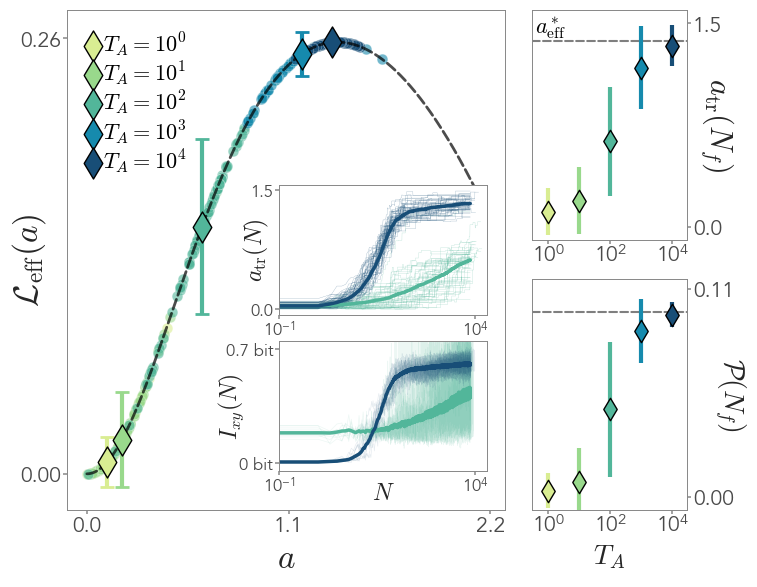

In [167]:
fig, axs = plt.subplot_mosaic([['main', 'main', "s1"],
                               ['main', 'main', "s2"]], figsize=(8, 6.5))

plt.subplots_adjust(wspace=0.5, hspace=0.17)

# increase width of main plot
box = axs['main'].get_position()
axs['main'].set_position([box.x0, box.y0, box.width * 1.13, box.height])

axs['main'].plot(a_space, fa.functional_exact(sigma, a_space, theta_eta, Lambda), 'k--', zorder = np.inf, lw = 2, alpha = 0.7)

# add an axis on a specified position

for i in range(len(Nsteps_array)):
    color = colors_list[i]
    axs['main'].scatter(a_final[i, :], fa.functional_exact(sigma, a_final[i, :], theta_eta, Lambda),
                        s=60, alpha = 0.6, c = color, ec = "w", lw = 0.3)

    axs['main'].errorbar(np.mean(a_final[i, :]), fa.functional_exact(sigma, np.mean(a_final[i, :]), theta_eta, Lambda),
                         yerr = np.std(fa.functional_exact(sigma, a_final[i, :], theta_eta, Lambda)),
                         color = color, capsize = 5, zorder = np.inf, lw = 3, alpha = 1, fmt = "none", capthick=2)
    
    axs['main'].scatter(np.mean(a_final[i, :]), fa.functional_exact(sigma, np.mean(a_final[i, :]), theta_eta, Lambda),
                        s=250, label=f'$T_A=10^{{{int(np.log10(Nsteps_array[i]*dt))}}}$', alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                        marker = "d")
    

    axs["s1"].scatter(Nsteps_array[i]*dt, np.mean(a_final[i, :]), s=130, alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                      marker = "d")
    
    axs["s1"].errorbar(Nsteps_array[i]*dt, np.mean(a_final[i, :]), yerr = 2*np.std(a_final[i, :]),
                       color = color, capsize = 0, zorder = -1, lw = 3, alpha = 1, fmt = "none", capthick=2)

    axs["s2"].scatter(Nsteps_array[i]*dt, np.mean(CVyeta[i, :]), s=130, alpha = 1, zorder = np.inf, c = color, ec = "k", lw = 1,
                      marker = "d")
    
    axs["s2"].errorbar(Nsteps_array[i]*dt, np.mean(CVyeta[i, :]), yerr = 2*np.std(CVyeta[i, :]),
                          color = color, capsize = 0, zorder = -1, lw = 3, alpha = 1, fmt = "none", capthick=2)
    
axs["s2"].axhline(CVopt, color='k', alpha = 0.5, zorder = -10, ls = '--')
axs["s2"].set_ylim(-0.007, 0.115)
axs["s2"].set_yticks([0, 0.11])
axs["s2"].set_ylabel(r'$\mathcal{P}(N_f)$', fontsize = 20, labelpad = 10, rotation = -90)

for aa in [axs["s1"], axs["s2"]]:
    aa.set_xscale("log")
    aa.set_xlim(3e-1, 3e4)
    
    aa.set_xticks([1e0, 1e2, 1e4])

    fplot.right_ylabel(aa)

axs["s1"].axhline(aopt, color='k', alpha = 0.5, zorder = -10, ls = '--')
axs["s1"].set_ylim(-0.1, 1.6)
axs["s1"].set_yticks([0, 1.5])

axs["s1"].set_ylabel(r'$a_{\rm tr}(N_f)$', fontsize = 22, labelpad = 10, rotation = -90)
axs["s2"].set_xlabel(r'$T_A$', fontsize = 20)
# add text
axs['main'].text(1.07, 0.99, r'$a^*_{\rm eff}$', fontsize = 16, transform=axs['main'].transAxes, verticalalignment='top')

axs['main'].set_ylabel(r'$\mathcal{L}_{\rm eff}(a)$', fontsize = 24, labelpad = -20)
axs["main"].set_xlabel(r'$a$', fontsize = 24)
axs["main"].set_xticks([0, 1.1, 2.2])
axs["main"].set_yticks([0, 0.26])

    
inset1 = fig.add_axes([0.39, 0.17, 0.26, 0.2])
inset2 = fig.add_axes([0.39, 0.41, 0.26, 0.2])

inset1.tick_params(axis='both', which='major', labelsize=12)
inset2.tick_params(axis='both', which='major', labelsize=12)

atraj1 = np.load(f'../data/adaptEmp_a_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
atraj2 = np.load(f'../data/adaptEmp_a_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
stop1 = np.load(f'../data/adaptEmp_stopTime_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
stop2 = np.load(f'../data/adaptEmp_stopTime_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

Itraj1 = np.load(f'../data/adaptEmp_Ixy_Nsteps{Nsteps_array[-1]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')/np.log(2)
Itraj2 = np.load(f'../data/adaptEmp_Ixy_Nsteps{Nsteps_array[-3]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')/np.log(2)

amean1 = np.mean(abs(atraj1)[:, :np.min(stop1)], axis = 0)
amean2 = np.mean(abs(atraj2)[:, :np.min(stop2)], axis = 0)

Imean1 = np.mean(Itraj1[:, :np.min(stop1)], axis = 0)
Imean2 = np.mean(Itraj2[:, :np.min(stop2)], axis = 0)

lwa = 0.2
alphaa = 0.5
lwI = 0.5
alphaI = 0.1

for j in range(50):
    a_curr = atraj2[j, :stop2[j]]
    inset2.plot(abs(a_curr), color = colors_list[-3], lw = lwa, alpha = alphaa, zorder = -1)

    a_curr = atraj1[j, :stop1[j]]
    inset2.plot(abs(a_curr), color = colors_list[-1], lw = lwa, alpha = alphaa, zorder = 1)

for j in range(10):
    I_curr = Itraj2[j, :stop2[j]]
    inset1.plot(I_curr, color = colors_list[-3], lw = lwI, alpha = alphaI, zorder = -1)

    I_curr = Itraj1[j, :stop1[j]]
    inset1.plot(I_curr, color = colors_list[-1], lw = lwI, alpha = alphaI, zorder = 1)

inset2.plot(amean2, color = colors_list[-3], lw = 2.5, alpha = 1)
inset2.plot(amean1, color = colors_list[-1], lw = 2.5, alpha = 1)

inset2.set_xscale("log")
inset2.set_xlim(1e-1, 2e4)

inset1.plot(Imean2, color = colors_list[-3], lw = 2.5, alpha = 1)
inset1.plot(Imean1, color = colors_list[-1], lw = 2.5, alpha = 1)

inset1.set_xscale("log")
inset1.set_xlim(1e-1, 2e4)
inset1.set_ylim(-0.05, 0.75)

inset1.set_ylabel(r'$I_{xy}(N)$', fontsize = 17, labelpad = -15)
inset1.set_yticks([0, 0.7])
inset1.set_yticklabels(["0 bit", "0.7 bit"])
inset1.set_xticks([1e-1, 1e4])
inset1.set_xlabel(r'$N$', fontsize = 17, labelpad = -10)

inset2.set_ylabel(r'$a_{\rm tr}(N)$', fontsize = 17, labelpad = -15)
inset2.set_yticks([0, 1.5])
inset2.set_xticks([1e-1, 1e4])

inset2.add_patch(plt.Rectangle((0.1, -0.1), 2e4, 1.7, fc="w", ec="none", zorder=-2))
inset1.add_patch(plt.Rectangle((0.1, -0.1), 2e4, 1.7, fc="w", ec="none", zorder=-2))

axs["main"].legend(loc = "upper left", fontsize = 16, frameon = False)

plt.savefig('../figures/SM/SM_adaptation_draft.svg', bbox_inches = 'tight', dpi = 300)
plt.show()